# Lab 6 Using AI in Python for Data Analysis

## Secret Manager Function

In [1]:
import boto3
from botocore.exceptions import ClientError
import json

def get_secret(secret_name):
    region_name = "us-east-1"

    # Create a Secrets Manager client
    session = boto3.session.Session()
    client = session.client(
        service_name='secretsmanager',
        region_name=region_name
    )

    try:
        get_secret_value_response = client.get_secret_value(
            SecretId=secret_name
        )
    except ClientError as e:
        raise e

    secret = get_secret_value_response['SecretString']
    
    return json.loads(secret)

## Connect to Database

In [2]:
import psycopg2

conn = psycopg2.connect(host=get_secret('postgresql')['host'],
                      user=get_secret('postgresql')['username'],
                      password = get_secret('postgresql')['password'],
                      dbname=get_secret('postgresql')['engine'])

cur = conn.cursor()

## Question 1: Population Growth Rate

In [8]:
sql = """
     select * from population
     where fips = '19'
     """

In [20]:
import pandas as pd

Iowa_df = pd.read_sql(sql, con=conn)
Iowa_df.head()

/tmp/ipykernel_6939/640210037.py:3: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  Iowa_df = pd.read_sql(sql, con=conn)


,fips,pop,year
0,19,2862541,2005
1,19,2982085,2006
2,19,2988047,2007
3,19,3002557,2008
4,19,3007857,2009


In [16]:
! pip install jupyter-ai-magics[all] -q

In [17]:
import os
os.environ["OPENAI_API_KEY"] = get_secret('openai')['api_key']

In [18]:
%load_ext jupyter_ai_magics

In [23]:
%%ai gpt4 -f code
Calculate the year over year population growth rate for the state of Iowa with the data provided in {Iowa_df}, use the va_df directly, and visualize the result on a line char

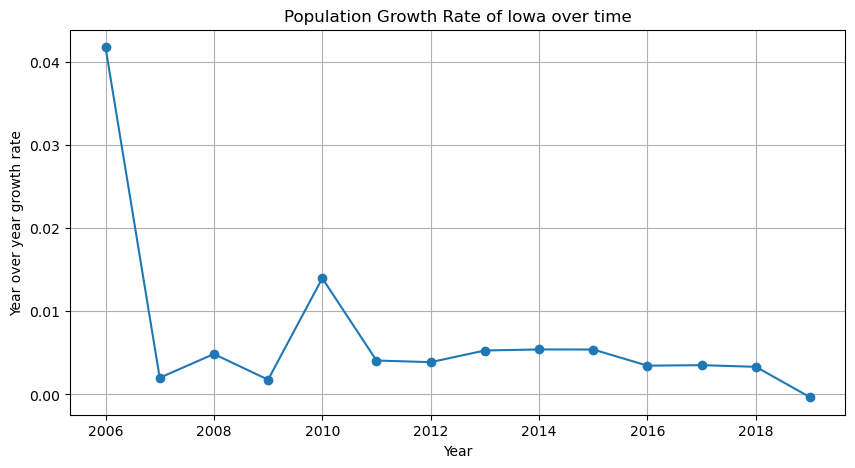

In [25]:
import pandas as pd
import matplotlib.pyplot as plt

# Given data
data = {
    'fips': [19]*15,
    'pop': [2862541, 2982085, 2988047, 3002557, 3007857, 3049883, 3062309, 3074186, 3090416, 3107126, 3123899, 3134693, 3145711, 3156145, 3155070],
    'year': [2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019]
}

df = pd.DataFrame(data)

# Year over year (YoY) population growth rate calculation
df['yoy_growth'] = df['pop'].pct_change()

# Plotting
plt.figure(figsize=[10,5])
plt.plot(df['year'], df['yoy_growth'], marker='o')
plt.xlabel('Year')
plt.ylabel('Year over year growth rate')
plt.title('Population Growth Rate of Iowa over time')
plt.grid(True)
plt.show()

### Analysis: There was a major drop in population growth rate between 2006 and 2008. Then afterwards it has remained mostly stagnant, besides a slight boost in 2010.

## Question 2: Income and Population Relationship

In [26]:
sql = """
     select * from income_population
     where fips = '19'
     """

In [27]:
Iowa2_df = pd.read_sql(sql, con=conn)
Iowa2_df.head()

/tmp/ipykernel_6939/909872051.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  Iowa2_df = pd.read_sql(sql, con=conn)


,fips,year,income,pop
0,19,2005,43609,2862541
1,19,2006,44491,2982085
2,19,2007,47292,2988047
3,19,2008,48980,3002557
4,19,2009,48044,3007857


In [28]:
%%ai gpt4 -f code
Can you create code resorting in a dual-axis chart comparing between population and income for the state of Iowa with the data provided in {Iowa2_df}, and use Iowa2_df directly

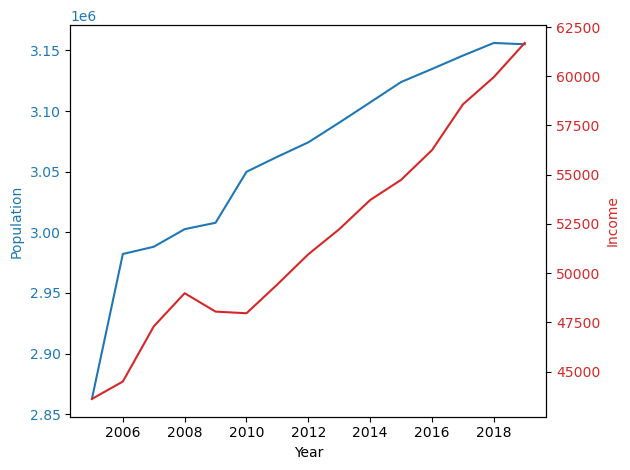

In [29]:
import pandas as pd
import matplotlib.pyplot as plt

# Given data
data = {
    'fips': [19]*15,
    'year': [2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019],
    'income': [43609, 44491, 47292, 48980, 48044, 47961, 49427, 50957, 52229, 53712, 54736, 56247, 58570, 59955, 61691],
    'pop': [2862541, 2982085, 2988047, 3002557, 3007857, 3049883, 3062309, 3074186, 3090416, 3107126, 3123899, 3134693, 3145711, 3156145, 3155070]
}
df = pd.DataFrame(data)

# Create dual-axis chart
fig, ax1 = plt.subplots()

color = 'tab:blue'
ax1.set_xlabel('Year')
ax1.set_ylabel('Population', color=color)
ax1.plot(df['year'], df['pop'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Income', color=color)
ax2.plot(df['year'], df['income'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.show()

### Analysis: From the graph created by AI with my new view, population is directly correlated with income. Showing that both positively increase at the same time together.

## Question 3: What is the average income per year in the state of Iowa

In [ ]:
sql = """
     select * from name_income
     where fips = '19'
     """

In [30]:
Iowa3_df = pd.read_sql(sql, con=conn)
Iowa3_df.head()

/tmp/ipykernel_6939/831251257.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  Iowa3_df = pd.read_sql(sql, con=conn)


,fips,year,income,pop
0,19,2005,43609,2862541
1,19,2006,44491,2982085
2,19,2007,47292,2988047
3,19,2008,48980,3002557
4,19,2009,48044,3007857


In [31]:
%%ai gpt4 -f code
Create a line graph for the state of Iowa showing the average income per year using the data provided in {Iowa3_df}, and use Iowa3_df directly

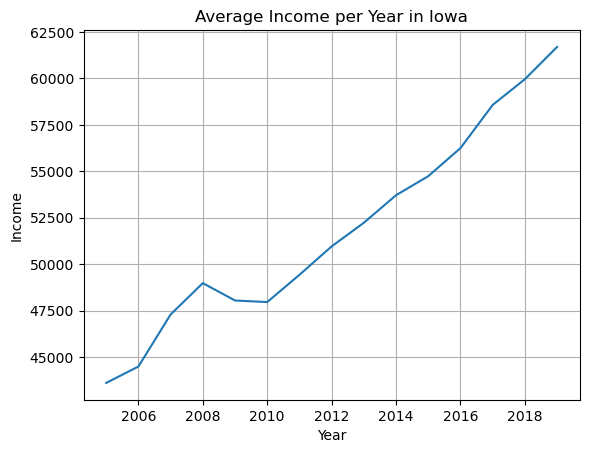

In [32]:
import pandas as pd
import matplotlib.pyplot as plt

# Given data
data = {
    'fips': [19]*15,
    'year': [2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019],
    'income': [43609, 44491, 47292, 48980, 48044, 47961, 49427, 50957, 52229, 53712, 54736, 56247, 58570, 59955, 61691],
    'pop': [2862541, 2982085, 2988047, 3002557, 3007857, 3049883, 3062309, 3074186, 3090416, 3107126, 3123899, 3134693, 3145711, 3156145, 3155070]
}
df = pd.DataFrame(data)

# Plotting
plt.plot(df['year'], df['income'])
plt.xlabel('Year')
plt.ylabel('Income')
plt.title('Average Income per Year in Iowa')
plt.grid(True)
plt.show()